# Zadanie

Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)  **(1p.)**
2. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) **(1p.)**
3. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników (słupki błędów)  **(1p.)**

# Wczytywanie pliku csv

In [3]:
#install.packages('tidyverse')
#library("tidyverse")
data = read_csv("multiplication_data.csv")
data

Rows: 400 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): type
dbl (2): n, time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,n,time
<chr>,<dbl>,<dbl>
dot,2e+06,0.0031457
dot,2e+06,0.0022179
dot,2e+06,0.0022438
dot,2e+06,0.0022575
dot,2e+06,0.0031373
dot,2e+06,0.0032802
dot,2e+06,0.0032064
dot,2e+06,0.0031639
dot,2e+06,0.0025601


# Przekształcenia danych

In [7]:
avg_data <- data %>%
    group_by(n, type) %>%
    summarise(
        time_sd = sd(time),
        time = mean(time)
    )
avg_data
dots <- avg_data$type == "dot"
stars <- avg_data$type == "star"

`summarise()` has grouped output by 'n'. You can override using the `.groups` argument.


n,type,time_sd,time
<dbl>,<chr>,<dbl>,<dbl>
1.0e+02,star,1.181429e-05,0.00012062
6.0e+02,star,5.056251e-05,0.00038666
1.1e+03,star,4.445474e-05,0.00087858
1.6e+03,star,5.354601e-05,0.00152437
2.1e+03,star,6.177053e-04,0.00329431
2.6e+03,star,3.256646e-04,0.00494149
3.1e+03,star,3.132446e-04,0.00599931
3.6e+03,star,1.199608e-04,0.00755513
4.1e+03,star,4.904408e-04,0.01023358


# Wykresy

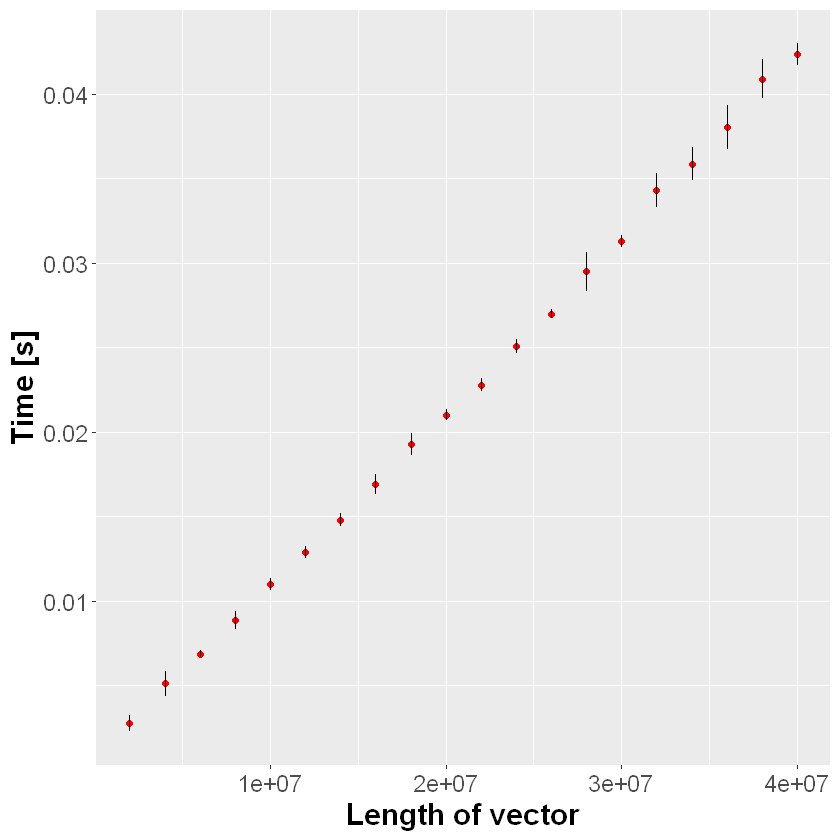

In [8]:
dot_graph <- ggplot(avg_data[dots, ], aes(x=n, y=time)) +
    geom_point(colour="red") +
    xlab(label="Length of vector") +
    ylab(label="Time [s]") +
    theme(axis.text=element_text(size=14), axis.title=element_text(size=18, face="bold")) +
    geom_errorbar(aes(ymin = time-time_sd, ymax = time+time_sd, width=.25))
dot_graph

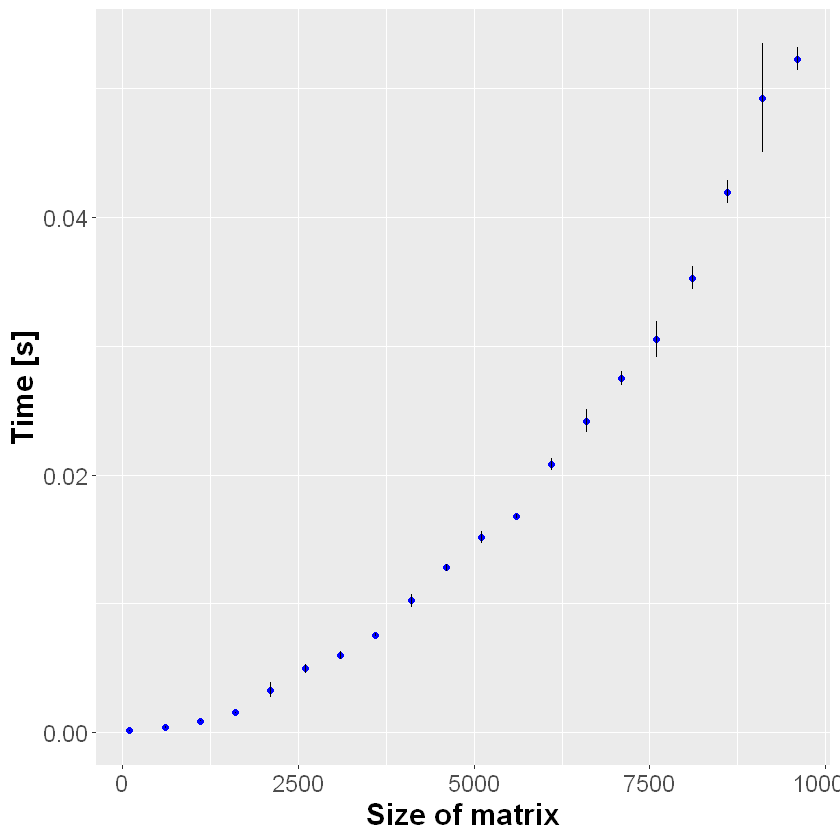

In [9]:
star_graph <- ggplot(avg_data[stars, ], aes(x=n, y=time)) +
    geom_point(colour="blue") +
    xlab(label="Size of matrix") +
    ylab(label="Time [s]") +
    theme(axis.text=element_text(size=14), axis.title=element_text(size=18,face="bold")) +
    geom_errorbar(aes(ymin = time-time_sd, ymax = time+time_sd, width=.25))
star_graph